> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if    they did not show up.


### Question(s) for Analysis
which factors are the main to patients attedance or absence their appointmentday 

In [81]:
# import statements for all of the packages t

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. **


### General Properties


In [83]:
# Load  data and print out a few lines. Perform operations to inspect data
df_medical= pd.read_csv('noshowappointments-kagglev2-may-2016.csv',sep=',')
df_medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [84]:
#ideentify column and row counts
df_medical.shape

(110527, 14)

dataset contain 110527 patientid and 14 column

In [85]:
#show statistics of dataset 
df_medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


age show max= 115 and min= -1 it's wrong value of minmum age need to modify.

mean of age 37 year

change age by year to decade to reduce range

mean show low percent of{Scholarship ,Hypertension ,Diabetes ,Alcoholism ,Handcap ,SMS_received}
                       {0.098266   ,0.197246      ,0.071865 ,0.030400  ,0.022248 ,0.321026}respecly
                       
 wrong word  Hipertension will be    Hypertension 
 
 
 SMS_received  rename to Sms_received
 
                       

In [86]:
#show if dataset have Nan values
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no nan value 

ScheduledDay and AppointmentDay has type string and need to convert to datetime

No-show  adding underscore( _ ) as used to be No_show

In [87]:
#identify unique values
df_medical.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

PatientId =62299 but AppointmentID=110527 so duplication of PatientId 

there are only 27 days for  110527 AppointmentDay for all patients  it may be reason of crowd and miss appointmen

there are 81 Neighbourhood  in the city 



In [88]:
#identify duplicated rows
df_medical.duplicated().sum()

0

no duplicated rows need to drop

In [89]:
#identify  duplicated PatientId with 
df_medical['PatientId'].duplicated().sum()

48228

patients show appointment more than once

In [90]:
#identify duplicated patientid with the same AppointmentDay , ScheduledDay,Age and SMS_received
df_medical.duplicated(['PatientId','AppointmentDay','ScheduledDay','Age','SMS_received']).sum()


632

 duplicated patient with same creteria of(AppointmentDay,ScheduledDay,Age,SMS_received)
    
    need to be deleted

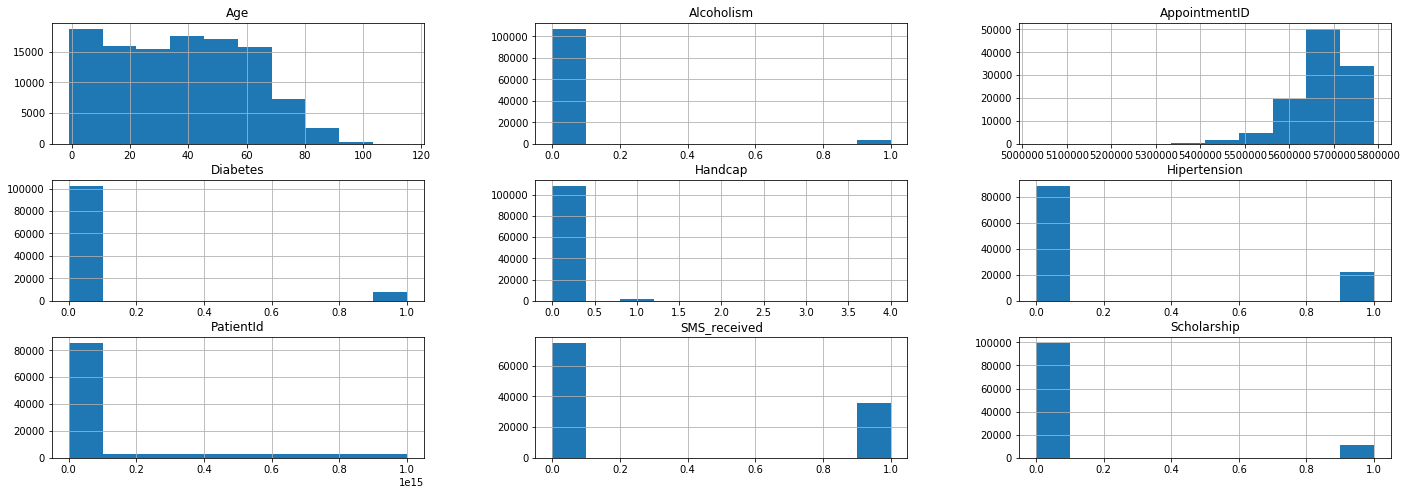

In [91]:
#show histogram of columns
df_medical.hist(figsize =(24,8));

histogram show high value of children and count of age is low abov 50 year

low percent which have(Diabetes,Hipertension )diseases

small percent drinking alcohol

sms message didn't sent to 75% of patient

low percent of patient have Handcapis and wrong value as(3,4) wiil be neglected 

low percent of patient have enrolled in Brasilian welfare program Bolsa Família.

In [92]:
#show datatypes for each column
df_medical.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [93]:
#index row of negtive number of age 
df_medical[df_medical['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


negtive age need to be deleted


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [94]:
#delete row with negtive age 
df_medical.drop(99832,axis=0,inplace=True)

In [95]:
#delete duplicated row with smae PatientId','AppointmentDay','ScheduledDay','Age','SMS_received
df_medical.drop_duplicates(['PatientId','AppointmentDay','ScheduledDay','Age','SMS_received'],inplace=True)

In [96]:
#delete rows with value 3,4  
df_medical.drop(df_medical.index[(df_medical["Handcap"] >1)],axis=0,inplace=True)

In [97]:
#rename wrong spelling Hipertension to Hypertension
df_medical.rename(columns = {'Hipertension' : 'Hypertension'},inplace=True)

In [98]:
#rename  word No-show to No_show
df_medical.rename(columns = {'No-show' : 'No_show'},inplace=True)
df_medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [99]:
#rename  word SMS_received to Sms_received
df_medical.rename(columns = {'SMS_received' : 'Sms_received'},inplace=True)
df_medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [100]:
df_medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received
count,1.096980e+05,1.096980e+05,109698.000000,109698.000000,109698.000000,109698.000000,109698.00000,109698.000000,109698.000000
mean,1.474865e+14,5.675441e+06,37.068278,0.098288,0.196813,0.071542,0.03042,0.018442,0.323023
std,2.560931e+14,7.130528e+04,23.109474,0.297705,0.397592,0.257729,0.17174,0.134542,0.467634
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.174836e+12,5.640403e+06,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3.174565e+13,5.680692e+06,37.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,9.439578e+13,5.725712e+06,55.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [101]:
#separate datetime to date for ScheduledDay , AppointmentDay
df_medical['ScheduledDay'] = pd.to_datetime(df_medical['ScheduledDay']).dt.date
df_medical['AppointmentDay'] = pd.to_datetime(df_medical['AppointmentDay']).dt.date
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109698 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         109698 non-null float64
AppointmentID     109698 non-null int64
Gender            109698 non-null object
ScheduledDay      109698 non-null object
AppointmentDay    109698 non-null object
Age               109698 non-null int64
Neighbourhood     109698 non-null object
Scholarship       109698 non-null int64
Hypertension      109698 non-null int64
Diabetes          109698 non-null int64
Alcoholism        109698 non-null int64
Handcap           109698 non-null int64
Sms_received      109698 non-null int64
No_show           109698 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


(ScheduledDay, AppointmentDay)  are string  and will convert to datetime

In [102]:
#convert ScheduledDay, AppointmentDay to datetime
df_medical['ScheduledDay'] = pd.to_datetime(df_medical['ScheduledDay'])
df_medical['AppointmentDay'] = pd.to_datetime(df_medical['AppointmentDay'])

df_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109698 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         109698 non-null float64
AppointmentID     109698 non-null int64
Gender            109698 non-null object
ScheduledDay      109698 non-null datetime64[ns]
AppointmentDay    109698 non-null datetime64[ns]
Age               109698 non-null int64
Neighbourhood     109698 non-null object
Scholarship       109698 non-null int64
Hypertension      109698 non-null int64
Diabetes          109698 non-null int64
Alcoholism        109698 non-null int64
Handcap           109698 non-null int64
Sms_received      109698 non-null int64
No_show           109698 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


count waiting days between ScheduledDay and AppointmentDay

In [103]:
#add column show differ of waiting days between AppointmentDay and ScheduledDay for patients appointment
df_medical["Waiting_days"]=df_medical["AppointmentDay"] - df_medical["ScheduledDay"]
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109698 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         109698 non-null float64
AppointmentID     109698 non-null int64
Gender            109698 non-null object
ScheduledDay      109698 non-null datetime64[ns]
AppointmentDay    109698 non-null datetime64[ns]
Age               109698 non-null int64
Neighbourhood     109698 non-null object
Scholarship       109698 non-null int64
Hypertension      109698 non-null int64
Diabetes          109698 non-null int64
Alcoholism        109698 non-null int64
Handcap           109698 non-null int64
Sms_received      109698 non-null int64
No_show           109698 non-null object
Waiting_days      109698 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(8), object(3), timedelta64[ns](1)
memory usage: 13.4+ MB


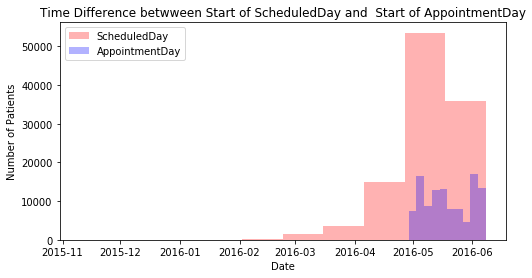

In [104]:
#histogram for ScheduledDay and AppointmentDay
dfig, ax = plt.subplots(figsize =(8,4))
ax.hist(df_medical['ScheduledDay'],color='red',alpha=0.3),
ax.hist(df_medical['AppointmentDay'],color='blue',alpha=0.3)
ax.set_title('Time Difference betwween Start of ScheduledDay and  Start of AppointmentDay')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Patients')
ax.legend(loc='upper left');

histgram show appointday start late for ScheduledDay in 29/4/2016 

which indicate a long time  of waiting the appointment and need to measure

In [105]:
#convert waiting_days  to string then separate values from (day) word then convert to integar 
df_medical["Waiting_days"] = df_medical["Waiting_days"].astype(str)
df_medical["Waiting_days"] = df_medical["Waiting_days"].apply(lambda x: x.split(" ")[0])
df_medical["Waiting_days"] = df_medical["Waiting_days"].astype(int)
df_medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received,Waiting_days
count,1.096980e+05,1.096980e+05,109698.000000,109698.000000,109698.000000,109698.000000,109698.00000,109698.000000,109698.000000,109698.000000
mean,1.474865e+14,5.675441e+06,37.068278,0.098288,0.196813,0.071542,0.03042,0.018442,0.323023,10.158818
std,2.560931e+14,7.130528e+04,23.109474,0.297705,0.397592,0.257729,0.17174,0.134542,0.467634,15.253630
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-6.000000
25%,4.174836e+12,5.640403e+06,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,3.174565e+13,5.680692e+06,37.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000
75%,9.439578e+13,5.725712e+06,55.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,179.000000


waiting days minmum  negtive 

In [106]:
df_medical[df_medical['Waiting_days']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received,No_show,Waiting_days
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [107]:
#delete rows with negtive value of waiting_days
df_medical.drop(df_medical.index[(df_medical["Waiting_days"] < 0)],axis=0,inplace=True)
df_medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received,Waiting_days
count,1.096930e+05,1.096930e+05,109693.000000,109693.000000,109693.000000,109693.000000,109693.000000,109693.000000,109693.000000,109693.000000
mean,1.474837e+14,5.675441e+06,37.068446,0.098293,0.196822,0.071545,0.030421,0.018424,0.323038,10.159372
std,2.560847e+14,7.130676e+04,23.109332,0.297711,0.397598,0.257734,0.171744,0.134480,0.467639,15.253751
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174724e+12,5.640401e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174640e+13,5.680693e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439578e+13,5.725713e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


change days to weeks to reduce range

In [108]:
#change days to weeks to reduce range
df_medical["Waiting_weeks"]=(df_medical["Waiting_days"]/7+1).astype(int)
df_medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received,No_show,Waiting_days,Waiting_weeks
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1


In [109]:
#change age by year to decade to reduce range
df_medical["Decade"]=(df_medical["Age"]/10+1).astype(int)
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109693 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         109693 non-null float64
AppointmentID     109693 non-null int64
Gender            109693 non-null object
ScheduledDay      109693 non-null datetime64[ns]
AppointmentDay    109693 non-null datetime64[ns]
Age               109693 non-null int64
Neighbourhood     109693 non-null object
Scholarship       109693 non-null int64
Hypertension      109693 non-null int64
Diabetes          109693 non-null int64
Alcoholism        109693 non-null int64
Handcap           109693 non-null int64
Sms_received      109693 non-null int64
No_show           109693 non-null object
Waiting_days      109693 non-null int64
Waiting_weeks     109693 non-null int64
Decade            109693 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(11), object(3)
memory usage: 15.1+ MB


In [110]:
#remove column
df_medical.drop(['AppointmentID','Age','Waiting_days'],axis=1,inplace=True)
df_medical.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received,No_show,Waiting_weeks,Decade
0,2.987250e+13,F,2016-04-29,2016-04-29,JARDIM DA PENHA,0,1,0,0,0,0,No,1,7
1,5.589978e+14,M,2016-04-29,2016-04-29,JARDIM DA PENHA,0,0,0,0,0,0,No,1,6
2,4.262962e+12,F,2016-04-29,2016-04-29,MATA DA PRAIA,0,0,0,0,0,0,No,1,7
3,8.679512e+11,F,2016-04-29,2016-04-29,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,1
4,8.841186e+12,F,2016-04-29,2016-04-29,JARDIM DA PENHA,0,1,1,0,0,0,No,1,6


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (which factor from {Age 	Scholarship 	Hypertension 	Diabetes 	Alcoholism 	Handcap 	Sms_received 	Waiting_days}affect on patient  attendence the appoinment  )

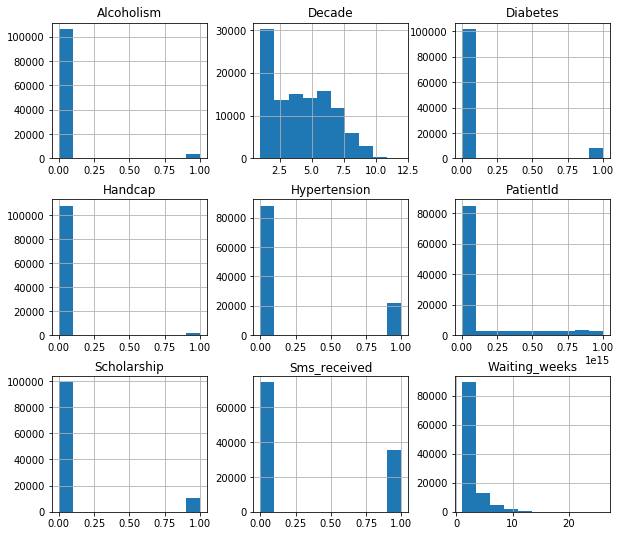

In [111]:
#explore data
df_medical.hist(figsize =(10,9));

dividing patients into two section      

df_attend as patients attend appointment  
                                   
df_absent as patients absent  appointment          

In [112]:
#df_attend as patients attend appointment 
df_attended = df_medical[df_medical['No_show'] == 'No']
df_attended.describe()

,PatientId,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received,Waiting_weeks,Decade
count,8.764300e+04,87643.000000,87643.000000,87643.000000,87643.000000,87643.000000,87643.000000,87643.000000,87643.000000
mean,1.477367e+14,0.093858,0.204078,0.073423,0.030487,0.018998,0.292779,2.028171,4.346656
std,2.564382e+14,0.291633,0.403028,0.260831,0.171925,0.136517,0.455040,2.001436,2.316687
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.172382e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,3.176923e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,9.435598e+13,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.000000
max,9.999816e+14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,12.000000


In [113]:
#df_absent as patients absent appointment 
df_absent = df_medical[df_medical['No_show'] == 'Yes']
df_absent.describe()

,PatientId,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,Sms_received,Waiting_weeks,Decade
count,2.205000e+04,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000
mean,1.464780e+14,0.115918,0.167982,0.064082,0.030159,0.016145,0.443311,2.906304,3.987438
std,2.546782e+14,0.320134,0.373859,0.244904,0.171028,0.126036,0.496787,2.358638,2.186812
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.176779e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,3.155597e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,9.454290e+13,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,6.000000
max,9.996585e+14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,12.000000


mean of Waiting_weeks 	 for attendance =2.028171 week ,mean ofWaiting_weeks for absent = 2.906304​ week

mean of SMS_received for attendance = 0.291429 ,mean of SMS_received for absent =0.438872 it is low percent and reversed correltion between sms_rceived and attend appointment

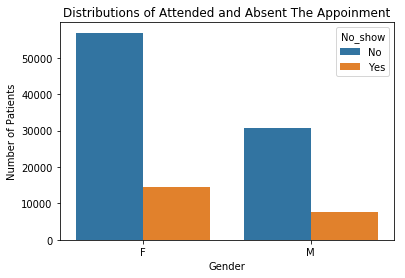

In [114]:
#histgrmam indicates  gender destribution with (attend ,absent appoinment)
plt.figure(figsize =(6,4))
plt.title('Distributions of Attended and Absent The Appoinment')
sns.countplot(data=df_medical, x="Gender", hue="No_show")
plt.ylabel('Number of Patients')
plt.show();

gender show  more females attend appointmentday but the percent of attend for male and maless  almost the same

In [115]:
#show destribution of gender
df_attended.groupby(['Gender'])['Gender'].count(),df_absent.groupby(['Gender'])['Gender'].count()


(Gender
 F    56878
 M    30765
 Name: Gender, dtype: int64, Gender
 F    14423
 M     7627
 Name: Gender, dtype: int64)

same percent of female and male in attendance and absence

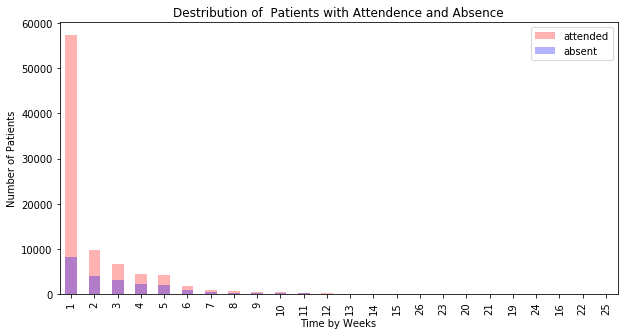

In [116]:
#Waiting_weeks affect on attendence
plt.figure(figsize =(10,5))
df_attended['Waiting_weeks'].value_counts().plot(kind='bar',alpha=0.3, color= 'red', label='attended')
df_absent['Waiting_weeks'].value_counts().plot(kind='bar',alpha=0.3, color= 'blue', label='absent')
plt.legend()
plt.title('Destribution of  Patients with Attendence and Absence')
plt.xlabel('Time by Weeks')
plt.ylabel('Number of Patients');

there is a negtive correlation between waiting weeks and attend appointmentday espicailly in first week

percentage of attendance get lower gradually with increasing time

review appoinment to be at least one  week waiting 

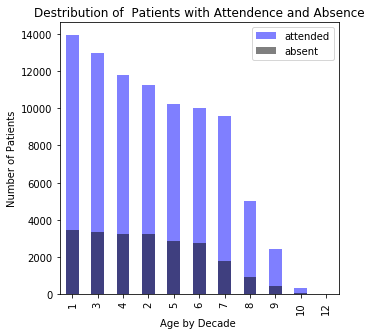

In [117]:
#age affect on attendence
plt.figure(figsize =(5,5))
df_attended['Decade'].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='attended')
df_absent['Decade'].value_counts().plot(kind='bar',alpha=0.5, color= 'black', label='absent')
plt.legend()
plt.title('Destribution of  Patients with Attendence and Absence')
plt.xlabel('Age by Decade ')
plt.ylabel('Number of Patients');

children have most attendence 

patients attendace decrease with increasing age to eighth decade and a high drop of attendance in 10,12 decade

ages of 60 years old and higher percent of attendance get lower  when age get higher

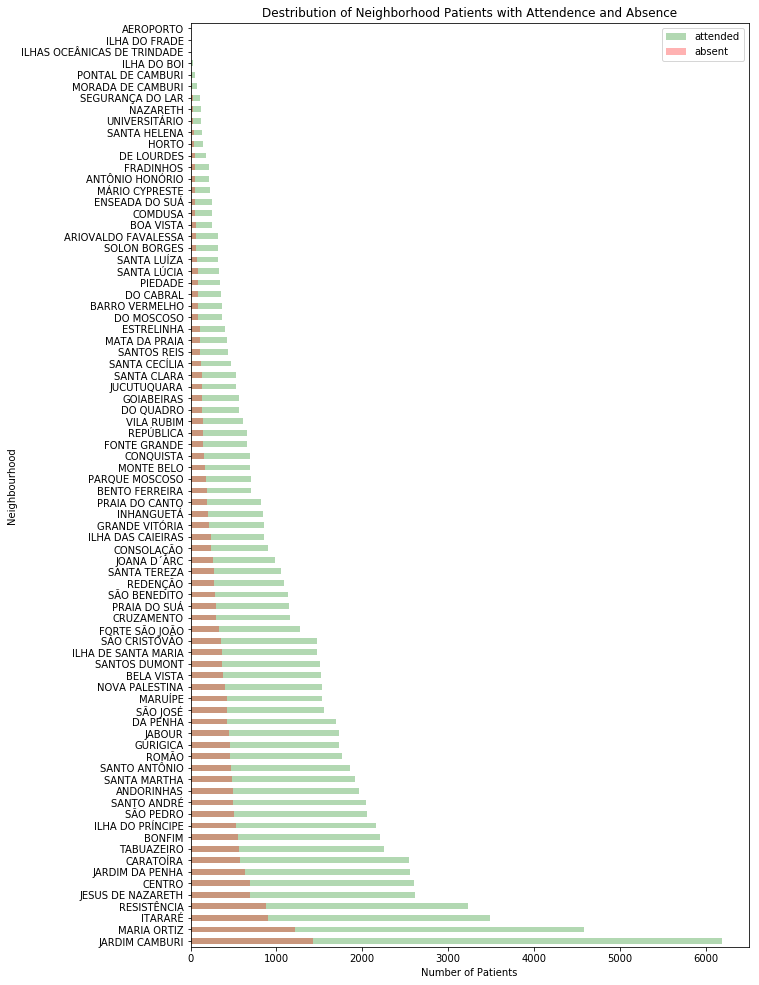

In [118]:
# show destribution of neighborhood patients with attendence and absence
plt.figure(figsize =(10,17))
df_attended['Neighbourhood'].value_counts().plot(kind='barh',alpha=0.3, color= 'green', label='attended')
df_absent['Neighbourhood'].value_counts().plot(kind='barh',alpha=0.3, color= 'red', label='absent')
plt.legend()
plt.title('Destribution of Neighborhood Patients with Attendence and Absence')
plt.xlabel('Number of Patients')
plt.ylabel('Neighbourhood');

JARDIM CAMURI and MARIA ORTIZ have great patients and great attend

Neighbourhood as factor affect on percentage of attendance

some Neighbourhood is factor of higher value of attendence and absence

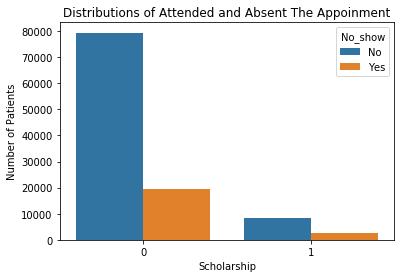

In [119]:
#destibution of attendece accord  Scholarship
plt.figure(figsize =(6,4))
plt.title('Distributions of Attended and Absent The Appoinment')
sns.countplot(data=df_medical, x="Scholarship", hue="No_show")
plt.ylabel('Number of Patients')
plt.show();

no correlation between scholarship and attend appoinment

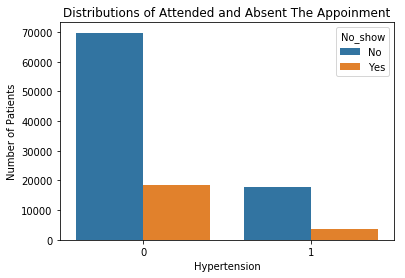

In [120]:
#destibution of attendece accord  Hypertension
plt.figure(figsize =(6,4))
plt.title('Distributions of Attended and Absent The Appoinment')
sns.countplot(data=df_medical, x="Hypertension", hue="No_show")
plt.ylabel('Number of Patients')
plt.show();

no correlation between Hypertension and attend appoinment 

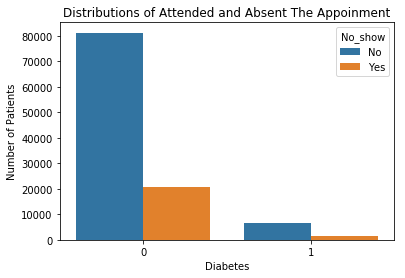

In [121]:
#destibution of attendece accord  Diabetes
plt.figure(figsize =(6,4))
plt.title('Distributions of Attended and Absent The Appoinment')
sns.countplot(data=df_medical, x="Diabetes", hue="No_show")
plt.ylabel('Number of Patients')
plt.show();

no correlation between Diabetes and attend appoinment 

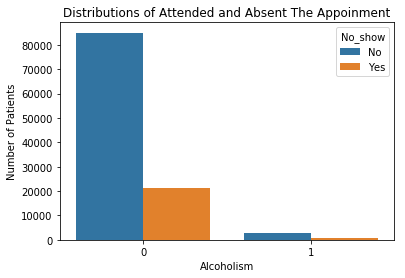

In [122]:
#destibution of attendece accord  Alcoholism
plt.figure(figsize =(6,4))
plt.title('Distributions of Attended and Absent The Appoinment')
sns.countplot(data=df_medical, x="Alcoholism", hue="No_show")
plt.ylabel('Number of Patients')
plt.show();

no correlation between Alcoholism and attend appoinment 

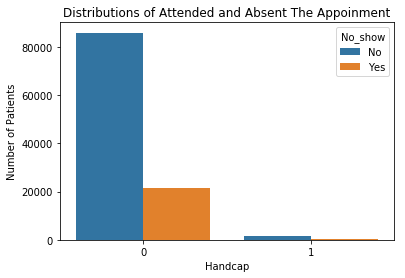

In [123]:
#destibution of attendece accord  Handcap
plt.figure(figsize =(6,4))
plt.title('Distributions of Attended and Absent The Appoinment')
sns.countplot(data=df_medical, x="Handcap", hue="No_show")
plt.ylabel('Number of Patients')
plt.show();

no correlation between Handcap and attend appoinment 

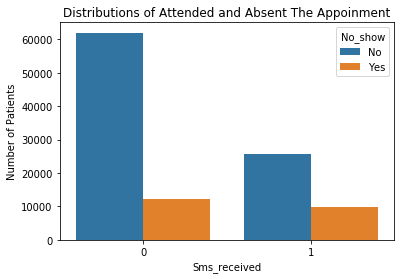

In [124]:
#destibution of attendece accord  Sms_received
plt.figure(figsize =(6,4))
plt.title('Distributions of Attended and Absent The Appoinment')
sns.countplot(data=df_medical, x="Sms_received", hue="No_show")
plt.ylabel('Number of Patients')
plt.show();

reverse correlation between sms and attendance appointmentday

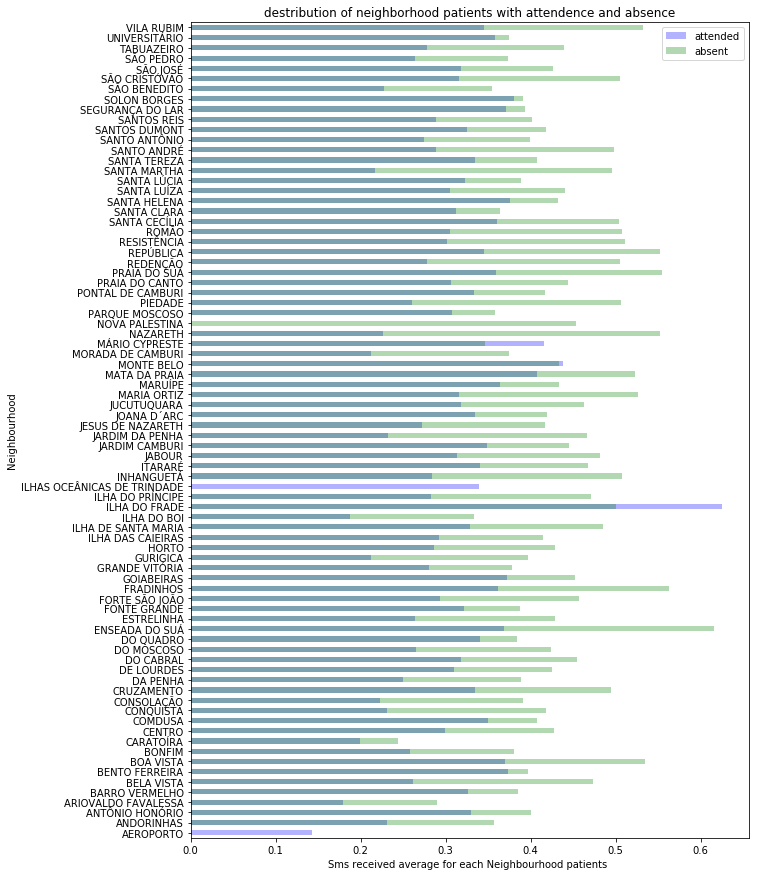

In [125]:
#relation between Sms_received aveage in Neighbourhood
def show(Neighbourhood,Sms_received):
    plt.figure(figsize =(10,15))
    df_attended.groupby(['Neighbourhood'])['Sms_received'].mean().plot(kind='barh',alpha=0.3, color= 'blue', label='attended')
    df_absent.groupby(['Neighbourhood'])['Sms_received'].mean().plot(kind='barh',alpha=0.3, color= 'green', label='absent')
    plt.legend()
    plt.title('destribution of neighborhood patients with attendence and absence')
    plt.xlabel('Sms received average for each Neighbourhood patients ')
    plt.ylabel('Neighbourhood');
show('Neighbourhood','Sms_received')

as shown destribution of sms on Neighbourhood have higher value   in just  4 Neighbourhood

review the system of sms in these neighborhood as a reference for other neighborhood

<a id='conclusions'></a>
## Conclusions
there is a negtive correlation between waiting weeks and attend appointmentday espicailly in first week

percentage of attendance get lower gradually with increasing time

review appoinment to be at least one  week waiting 

children have most attendence 

patients attendace decrease with increasing age to eighth decade and a high drop of attendance in 10,12 decade


JARDIM CAMURI and MARIA ORTIZ have great patients and great attend

Neighbourhood as factor affect on percentage of attendance

some Neighbourhood is factor of higher value of attendence and absence

destribution of sms on Neighbourhood have higher value in just 4 Neighbourhood

review the system of sms in these neighborhood as a reference for other neighborhood

### limitation
no correlatin for ( gender scholarship 	Hipertension 	Diabetes 	Alcoholism 	Handcap 	)



